In [3]:
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np

In [4]:
origin = pd.read_csv(r'./data/train_dm300_full.csv')
wrong = pd.read_csv(r'./data/comparison_table.csv')
group = wrong.groupby('solute_smiles')['solute_smiles'].nunique()

In [17]:
appended_data = []
for smile in group.index:
    try:
        temp = origin[origin['solute_smiles']==smile]
        appended_data.append(temp)
    except:
        print(smile)
main = pd.concat(appended_data)

In [6]:
solvents = ["Acet", "MeCN", "MeOH", "DMF", "EtOH", "IPA", "EtOAc", "MeTHF", "Tol", "MTBE", "Hept"]
solvent_dict = {"Acetone":"Acetone", 
                "Acetonitrile":"Acetonitrile",
                "Methanol":"Methanol", 
                "Dimethyl formamide":"Dimethyl formamide", 
                "Ethanol":"Ethanol", 
                "2-Propanol":"2-Propanol", 
                "Etyl acetate":"Ethyl acetate",
                "2-Methly tetrahydrofurane":"2-Methyl tetrahydrofurane",
                "Toluene":"Toluene", 
                "Methyl tert butyl ether":"Methyl tert-butyl ether",       
                "Heptane":"Heptane"
}

solvent_lst = []
for solvent, name in zip(solvents, solvent_dict.keys()):
    solvent_lst.append(main[main['solvent_name']==name])

In [21]:
data = np.zeros((len(group.index), len(solvent_dict.keys())))
data.fill(np.NaN)
solvent_names = list(solvent_dict.keys())

for i, row in enumerate(data):
    solute = group.index[i]
    for j, idx in enumerate(row):
        solvent = solvent_names[j]
        df = main[main['solute_smiles']==solute]
        try:
            value = df.loc[df['solvent_name'] == solvent]['dm300'].values[0]
            data[i,j] = round(value, 2)
        except:
            data[i,j] = np.NaN
 


In [23]:
solvents = ["Acet", "MeCN", "MeOH", "DMF", "EtOH", "IPA", "EtOAc", "MeTHF", "Tol", "MTBE", "Hept"]
solutes = range(len(data))

TypeError: set_ticks() got an unexpected keyword argument 'labels'

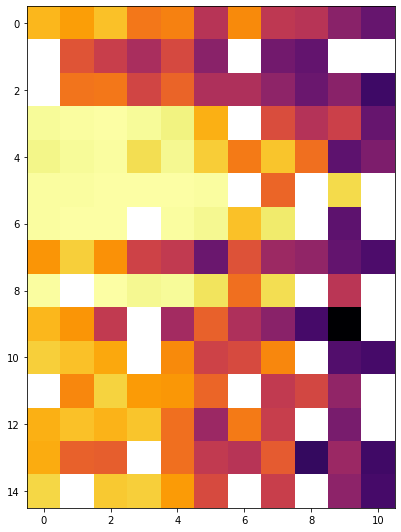

In [24]:
fig, ax = plt.subplots(figsize=(7.5,7.5), tight_layout=True)
im = ax.imshow(data, cmap='inferno')

ax.set_yticks(np.arange(len(solutes)), labels=solutes)
ax.set_xticks(np.arange(len(solvents)), labels=solvents)
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
plt.setp(ax.get_xticklabels(), rotation=45, ha='left')
for i in range(len(solutes)):
    for j in range(len(solvents)):
        text = ax.text(j, i, data[i,j], ha='center', va='center', color='w')
plt.savefig(r'./figures/heatmap.svg', dpi=300)
plt.show()

'O=C(C1=CC=C(F)C=C1)C2=CC=C(F)C=C2'

In [180]:
import rdkit
from rdkit import Chem

In [27]:
mols = [Chem.MolFromSmiles(mol) for mol in list(group.index)]

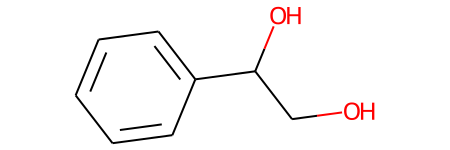

In [25]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import os
from chemprop.utils import makedirs

def moltosvg(mol, molSize = (300,300), kekulize = True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')



In [29]:

# save_path = os.path.join(args.bayes_path, target_name)
makedirs('./data/test/')
for indx,mol in enumerate(mols):
    svg = moltosvg(mol)
    with open(os.path.join('./data/molecule_images', f'heatmap_{indx}.svg'), 'w') as f:f.write(svg)